In [1]:
#import packages
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import cv2
import numpy as np
import scipy.io

Using TensorFlow backend.
c:\users\dclap\pycharmprojects\emotion_recognition\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\dclap\pycharmprojects\emotion_recognition\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\dclap\pycharmprojects\emotion_recognition\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np

In [2]:
#load the data
x={}

mat = scipy.io.loadmat('data/extra_32x32.mat')
for i in range(0,500000):
    x[i]=mat['X'][:,:,:,i].reshape(32,32,3)


In [3]:
#make the label of '0' to 0    
for i in range(1,500000):
    if mat['y'][i]==10:
        mat['y'][i]=0    

#load the labels 0:9
y={}
for i in range(0,500000):
    y[i]=mat['y'][i]        

c:\users\dclap\pycharmprojects\emotion_recognition\venv\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


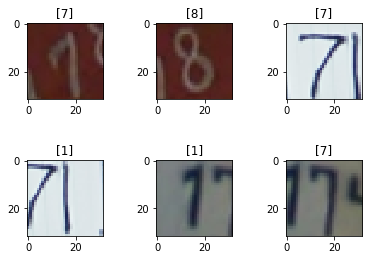

In [4]:
#showing some of data
fig = plt.figure()
fig.subplots_adjust(hspace=0.7, wspace=0.7)
for i in range (1,7):
    ax = fig.add_subplot(2, 3, i)
    plt.imshow(x[i].reshape(32,32,3))
    plt.title(y[i])

In [4]:
#split the data
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.25, random_state=42)

In [5]:
#changing the lists to numpy array
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [6]:
#make the data float
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [9]:
#function to change the rgb images into grey scale image
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

In [ ]:
#convert color on trainng
x_train1=np.zeros(shape=(375000,32,32))
for i in range (0,375000):
    x_train1[i]=rgb2gray(x_train[i])


In [10]:
#convert color of testing 
x_test1=np.zeros(shape=(125000,32,32))
for i in range (0,125000):
    x_test1[i]=rgb2gray(x_test[i])

In [11]:
x_test1=x_test1.reshape(125000,32,32,1)
x_train1=x_train1.reshape(375000,32,32,1)     

In [12]:
x_train=x_train/255
x_test=x_test/255

In [13]:
#preprocessing for the labels
y_test=to_categorical(y_test,num_classes=10)
y_train=to_categorical(y_train,num_classes=10)
y_test.shape

(125000, 10)

In [14]:
#the model
model=Sequential()

#1st convolution layer
model.add(Conv2D(30, (5, 5), input_shape=(32,32,1), activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2)))
 
#2rd convolution layer
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
#flatten
model.add(Flatten())
#layer 1
model.add(Dense(128,activation='relu')) 
#layer 2
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])


es=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10,min_delta=0.0001)
mc=ModelCheckpoint('best_model21.hdf5',monitor='val_acc',verbose=1,save_best_only=True,mode='max')







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 15)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 540)               0         


In [15]:
#fitting the data
history=model.fit(x_train1, y_train, validation_data=(x_test1, y_test),callbacks=[es,mc], epochs=50, batch_size=200,verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 375000 samples, validate on 125000 samples
Epoch 1/50
375000/375000 [==============================] - 2978s 8ms/step - loss: 0.5907 - acc: 0.8261 - val_loss: 0.2356 - val_acc: 0.9349

Epoch 00001: val_acc improved from -inf to 0.93492, saving model to best_model21.hdf5
Epoch 2/50
375000/375000 [==============================] - 556s 1ms/step - loss: 0.2495 - acc: 0.9293 - val_loss: 0.1825 - val_acc: 0.9497

Epoch 00002: val_acc improved from 0.93492 to 0.94969, saving model to best_model21.hdf5
Epoch 3/50
375000/375000 [==============================] - 400s 1ms/step - loss: 0.2026 - acc: 0.9424 - val_loss: 0.1640 - val_acc: 0.9553

Epoch 00003: val_acc improved from 0.94969 to 0.95527, saving model to best_model21.hdf5
Epoch 4/50
375000/375000 [==============================] - 399s 1ms/step - loss: 0.1827 - acc: 0.9484 - val_loss: 0.1511 - val_acc: 0.9599

Epoch 00004: val_acc impr

In [16]:
test_eval = model.evaluate(x_test1, y_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.12068154388238489
Test accuracy: 0.96908
